In [3]:
import pandas as pd

In [4]:
x = pd.Series([34, 12, 23, 45])

In [5]:
print(x)

0    34
1    12
2    23
3    45
dtype: int64


In [4]:
x.dtype

dtype('int64')

int64 Werte, Zahlen die 8 Byte (64 Bit) Speicher benötigen

In [6]:
data = {'month': ['Jan', 'Feb', 'Mar'],
        'temp': [-5, 2, 3],
         'below_zero': [True, False, False]}

In [7]:
df = pd.DataFrame(data)

In [8]:
print(df)

  month  temp  below_zero
0   Jan    -5        True
1   Feb     2       False
2   Mar     3       False


a) Welches Skalenniveau besitzen die Variablen im obigen Beispiel?
b) Sind die Variablen stetig oder diskret?
c) Was ist der Datentyp jeder einzelnen Spalte?

a) month: ordinalskaliert, temp: intervallskaliert, below_zero: nominalskaliert
b) month: diskret, temp: stetig, below_zero: diskret
c) month: ?, temp: int, below-zero: bool

Lösung:   
    month: nominal (oder ordinal, wenn z.B. Dez > Jan gilt.), diskret, object
    temp: metrisch, stetig, int
    below_zero: nominal, diskret, boolean

Erweitere das Python-Dictionary und

    erstelle eine neue Zeile mit den Werten ('Apr', 5, False)
    erstelle eine neue Spalte year mit den Werten (2020, 2020, 2020, 2020)

In [9]:
data = {'month': ['Jan', 'Feb', 'Mar', 'Apr'],
        'temp': [-5, 2, 3, 5],
         'below_zero': [True, False, False, False],
        'year': [2020, 2020, 2020, 2020]
     }

In [10]:
df = pd.DataFrame(data)

In [11]:
print(df)

  month  temp  below_zero  year
0   Jan    -5        True  2020
1   Feb     2       False  2020
2   Mar     3       False  2020
3   Apr     5       False  2020


In [12]:
df = pd.read_csv("../data/Library_Usage.csv")

In [13]:
df.head()

,Patron Type Code,Patron Type Definition,Total Checkouts,Total Renewals,Age Range,Home Library Code,Home Library Definition,Circulation Active Month,Circulation Active Year,Notice Preference Code,Notice Preference Definition,Provided Email Address,Year Patron Registered,Outside of County,Supervisor District
0,0,ADULT,0,0,20 to 24 years,P1,Park,None,None,z,email,True,2014,False,5.0
1,0,ADULT,31,22,25 to 34 years,S7,Sunset,April,2016,z,email,True,2010,False,4.0
2,0,ADULT,0,0,45 to 54 years,P1,Park,None,None,a,print,False,2016,True,NaN
3,0,ADULT,0,0,25 to 34 years,X,Main Library,None,None,z,email,True,2015,False,3.0
4,0,ADULT,126,11,45 to 54 years,M2,Marina,January,2016,z,email,True,2003,False,2.0


In [15]:
df.memory_usage()
# Anzeige Speicherbedarf in Byte

Index                               128
Patron Type Code                3387584
Patron Type Definition          3387584
Total Checkouts                 3387584
Total Renewals                  3387584
Age Range                       3387584
Home Library Code               3387584
Home Library Definition         3387584
Circulation Active Month        3387584
Circulation Active Year         3387584
Notice Preference Code          3387584
Notice Preference Definition    3387584
Provided Email Address           423448
Year Patron Registered          3387584
Outside of County                423448
Supervisor District             3387584
dtype: int64

In [20]:
df.memory_usage(deep=True)

Index                                128
Patron Type Code                 3387584
Patron Type Definition          26722568
Total Checkouts                  3387584
Total Renewals                   3387584
Age Range                       30022389
Home Library Code               24860249
Home Library Definition         28744750
Circulation Active Month        26356718
Circulation Active Year         25830328
Notice Preference Code          24559984
Notice Preference Definition    26253773
Provided Email Address            423448
Year Patron Registered           3387584
Outside of County                 423448
Supervisor District              3387584
dtype: int64

In [14]:
df.to_json("../data/Library_Usage.json")

Was bedeutet pd und df und x in den Beispielen?
pd = pandas Bibliothek
df = data frame
x = Variable (Name) einer Serie

In [21]:
df.columns

Index(['Patron Type Code', 'Patron Type Definition', 'Total Checkouts',
       'Total Renewals', 'Age Range', 'Home Library Code',
       'Home Library Definition', 'Circulation Active Month',
       'Circulation Active Year', 'Notice Preference Code',
       'Notice Preference Definition', 'Provided Email Address',
       'Year Patron Registered', 'Outside of County', 'Supervisor District'],
      dtype='object')

In [26]:
x = df['Total Renewals']
print(x)
# einzelne Spalte extrahiert (wird Series)

0          0
1         22
2          0
3          0
4         11
          ..
423443    13
423444    11
423445    58
423446     0
423447     0
Name: Total Renewals, Length: 423448, dtype: int64


In [29]:
df[['Total Renewals', 'Total Checkouts']]
column_names = ['Total Renewals', 'Total Checkouts'] # auxiliary variable
subset = df[column_names]
print(x)
print(subset)
# 2 Spalten  extrahiert, doppelte List gibt neuen Dataframe

0          0
1         22
2          0
3          0
4         11
          ..
423443    13
423444    11
423445    58
423446     0
423447     0
Name: Total Renewals, Length: 423448, dtype: int64
        Total Renewals  Total Checkouts
0                    0                0
1                   22               31
2                    0                0
3                    0                0
4                   11              126
...                ...              ...
423443              13              291
423444              11               15
423445              58              208
423446               0               26
423447               0                0

[423448 rows x 2 columns]


In [30]:
df['dummy_variable'] = 5


In [31]:
import numpy as np

df['is_adult'] = df['Patron Type Definition'] == 'ADULT'
df['log_renewals'] = np.log(df['Total Renewals'] + 1)
# Erwachsen-richtig-falsch-Spalte wird angehangen an Datei
# Logarithmus der Verlängerungen wird als Spalte log-renewal angehangen

In [32]:
df.columns

Index(['Patron Type Code', 'Patron Type Definition', 'Total Checkouts',
       'Total Renewals', 'Age Range', 'Home Library Code',
       'Home Library Definition', 'Circulation Active Month',
       'Circulation Active Year', 'Notice Preference Code',
       'Notice Preference Definition', 'Provided Email Address',
       'Year Patron Registered', 'Outside of County', 'Supervisor District',
       'dummy_variable', 'is_adult', 'log_renewals'],
      dtype='object')

In [33]:
df.head()

,Patron Type Code,Patron Type Definition,Total Checkouts,Total Renewals,Age Range,Home Library Code,Home Library Definition,Circulation Active Month,Circulation Active Year,Notice Preference Code,Notice Preference Definition,Provided Email Address,Year Patron Registered,Outside of County,Supervisor District,dummy_variable,is_adult,log_renewals
0,0,ADULT,0,0,20 to 24 years,P1,Park,None,None,z,email,True,2014,False,5.0,5,True,0.000000
1,0,ADULT,31,22,25 to 34 years,S7,Sunset,April,2016,z,email,True,2010,False,4.0,5,True,3.135494
2,0,ADULT,0,0,45 to 54 years,P1,Park,None,None,a,print,False,2016,True,NaN,5,True,0.000000
3,0,ADULT,0,0,25 to 34 years,X,Main Library,None,None,z,email,True,2015,False,3.0,5,True,0.000000
4,0,ADULT,126,11,45 to 54 years,M2,Marina,January,2016,z,email,True,2003,False,2.0,5,True,2.484907


In [34]:
pd.to_numeric(
  df['Circulation Active Year'], errors='coerce'
)
# Die Spalte Circulation Active Year ist als Text und nicht als Zahl abgespeichert! Konvertiere die Spalte in ein numerisches Format. 
# Überschreibe die ursprüngliche Variable mit den neuen Werten. Nutze dieses Codesnippet:

0            NaN
1         2016.0
2            NaN
3            NaN
4         2016.0
           ...  
423443    2015.0
423444    2016.0
423445    2016.0
423446    2015.0
423447       NaN
Name: Circulation Active Year, Length: 423448, dtype: float64

In [35]:
pd.to_datetime(
    df['Circulation Active Month'],
    errors='coerce',
    format="%B"
)
# Die Spalte Circulation Active Month enthält die Monatsnamen als Text. 
# Für die Berechnung muss diese in ein numerisches Format konvertiert werden.
# Zuerst konvertieren wir die Spalte in ein Datumsformat. Das geht mit der Funktion pd.to_datetime. 
# Überschreibe wieder die ursprüngliche Variable mit den neuen Werten. Du kannst dieses Codesnippet nutzen:

0               NaT
1        1900-04-01
2               NaT
3               NaT
4        1900-01-01
            ...    
423443   1900-03-01
423444   1900-07-01
423445   1900-07-01
423446   1900-04-01
423447          NaT
Name: Circulation Active Month, Length: 423448, dtype: datetime64[ns]

In [36]:
# Jetzt extrahieren wir den Monat als Zahl aus der Spalte
df['Circulation Active Month'].dt.month


AttributeError: Can only use .dt accessor with datetimelike values

In [37]:
'Membership Duration' = ('Circulation Active Year' - 'Year Patron Registered')*12 + 'Circulation Active Month'


SyntaxError: cannot assign to literal (<ipython-input-37-803e20c6d456>, line 1)

In [15]:
df.loc[df['Total Checkouts'] > 10000]

,Patron Type Code,Patron Type Definition,Total Checkouts,Total Renewals,Age Range,Home Library Code,Home Library Definition,Circulation Active Month,Circulation Active Year,Notice Preference Code,Notice Preference Definition,Provided Email Address,Year Patron Registered,Outside of County,Supervisor District
851,9,SPECIAL,18064,2268,60 to 64 years,X,Main Library,July,2016,p,phone,False,2003,False,NaN
1963,0,ADULT,10521,621,60 to 64 years,X,Main Library,July,2016,p,phone,False,2003,False,6.0
3499,0,ADULT,12740,2209,45 to 54 years,C2,Chinatown,July,2016,z,email,True,2003,False,3.0
20042,3,SENIOR,16060,66,65 to 74 years,C2,Chinatown,July,2016,a,print,False,2003,False,3.0
31315,0,ADULT,13784,74,60 to 64 years,M4,Merced,June,2016,z,email,True,2003,False,11.0
39585,0,ADULT,11086,1083,35 to 44 years,C2,Chinatown,July,2016,p,phone,False,2003,False,3.0
57239,0,ADULT,10906,1421,45 to 54 years,P1,Park,July,2016,z,email,True,2003,False,8.0
86662,3,SENIOR,11748,963,65 to 74 years,X,Main Library,July,2016,z,email,True,2003,False,5.0
117628,0,ADULT,11817,2859,45 to 54 years,S7,Sunset,July,2016,z,email,True,2003,False,4.0
120604,3,SENIOR,10108,59,65 to 74 years,X,Main Library,November,2013,p,phone,False,2003,False,6.0


In [16]:
row_filter = df['Total Checkouts'] > 10000
df.loc[row_filter]

,Patron Type Code,Patron Type Definition,Total Checkouts,Total Renewals,Age Range,Home Library Code,Home Library Definition,Circulation Active Month,Circulation Active Year,Notice Preference Code,Notice Preference Definition,Provided Email Address,Year Patron Registered,Outside of County,Supervisor District
851,9,SPECIAL,18064,2268,60 to 64 years,X,Main Library,July,2016,p,phone,False,2003,False,NaN
1963,0,ADULT,10521,621,60 to 64 years,X,Main Library,July,2016,p,phone,False,2003,False,6.0
3499,0,ADULT,12740,2209,45 to 54 years,C2,Chinatown,July,2016,z,email,True,2003,False,3.0
20042,3,SENIOR,16060,66,65 to 74 years,C2,Chinatown,July,2016,a,print,False,2003,False,3.0
31315,0,ADULT,13784,74,60 to 64 years,M4,Merced,June,2016,z,email,True,2003,False,11.0
39585,0,ADULT,11086,1083,35 to 44 years,C2,Chinatown,July,2016,p,phone,False,2003,False,3.0
57239,0,ADULT,10906,1421,45 to 54 years,P1,Park,July,2016,z,email,True,2003,False,8.0
86662,3,SENIOR,11748,963,65 to 74 years,X,Main Library,July,2016,z,email,True,2003,False,5.0
117628,0,ADULT,11817,2859,45 to 54 years,S7,Sunset,July,2016,z,email,True,2003,False,4.0
120604,3,SENIOR,10108,59,65 to 74 years,X,Main Library,November,2013,p,phone,False,2003,False,6.0


In [17]:
row_filter = (df[r'Patron Type Definition'] == 'SENIOR') & (df['Notice Preference Definition'] == 'email')
df.loc[row_filter]
# alle Nutzer, die Senioren als Nutzertyp haben und sich per Email benachrichtigen lassen wollen

,Patron Type Code,Patron Type Definition,Total Checkouts,Total Renewals,Age Range,Home Library Code,Home Library Definition,Circulation Active Month,Circulation Active Year,Notice Preference Code,Notice Preference Definition,Provided Email Address,Year Patron Registered,Outside of County,Supervisor District
5,3,SENIOR,0,0,65 to 74 years,C2,Chinatown,None,None,z,email,True,2015,True,NaN
62,3,SENIOR,193,90,65 to 74 years,A5,Anza,July,2016,z,email,True,2007,False,1.0
176,3,SENIOR,7,8,65 to 74 years,X,Main Library,April,2014,z,email,True,2012,True,NaN
260,3,SENIOR,341,212,65 to 74 years,P1,Park,July,2016,z,email,True,2003,False,5.0
294,3,SENIOR,67,26,75 years and over,P5,Portola,July,2016,z,email,True,2009,False,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
423359,3,SENIOR,4,0,75 years and over,W4,Western Addition,May,2013,z,email,True,2012,False,5.0
423388,3,SENIOR,25,34,75 years and over,X,Main Library,May,2016,z,email,True,2015,True,NaN
423403,3,SENIOR,458,129,75 years and over,E9,Excelsior,June,2016,z,email,True,2003,True,NaN
423405,3,SENIOR,280,27,75 years and over,X,Main Library,July,2016,z,email,True,2003,False,9.0


# Welche Zeilen werden hier gefiltert?
Alle "Senior"-Nutzer (definiert als Nutzer, die mindestens 65 Jahre alt sind), die per Email benachrichtigt werden wollen

In [18]:
filter1 = (df['Total Checkouts'] >= 20) & (df['Total Checkouts'] <= 80)

In [19]:
filter2 =  df['Total Checkouts'].between(20, 80)

In [20]:
all(filter1 == filter2)

True

    Filtere den Datensatz nach Kindern unter 10 Jahren. Wie viele Einträge erhältst Du?
   - 38242 rows = 38242 Nutzer 
    Gibt es Personen mit mehr als 20000 Ausleihen?
    - 3 Nutzer
    Wie viele Personen stammen aus dem Norden San Franciscos (Supervisor Districts 1, 2 und 3)? Nutze die Funktion Series.isin().
    - 70091 rows = 70091 Nutzer
    Wie viele Prozent der Beobachtungen haben eine Membership Duration von Null Monaten?
    - 

In [21]:
row_filter = (df[r'Age Range'] == '0 to 9 years')

In [22]:
df.loc[row_filter]

,Patron Type Code,Patron Type Definition,Total Checkouts,Total Renewals,Age Range,Home Library Code,Home Library Definition,Circulation Active Month,Circulation Active Year,Notice Preference Code,Notice Preference Definition,Provided Email Address,Year Patron Registered,Outside of County,Supervisor District
287,1,JUVENILE,0,0,0 to 9 years,M6,Mission,None,None,p,phone,False,2014,False,6.0
289,1,JUVENILE,20,0,0 to 9 years,E9,Excelsior,July,2016,z,email,True,2016,False,11.0
291,1,JUVENILE,53,31,0 to 9 years,A5,Anza,June,2013,z,email,True,2012,False,1.0
292,1,JUVENILE,1,0,0 to 9 years,O7,Ortega,June,2014,z,email,True,2014,False,5.0
295,1,JUVENILE,0,0,0 to 9 years,A5,Anza,None,None,z,email,True,2016,False,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
423434,1,JUVENILE,10,0,0 to 9 years,V3,Visitacion Valley,September,2015,p,phone,False,2012,False,10.0
423437,1,JUVENILE,0,0,0 to 9 years,W4,Western Addition,None,None,z,email,True,2015,False,5.0
423439,1,JUVENILE,0,0,0 to 9 years,N4,Noe Valley/Sally Brunn,None,None,z,email,True,2015,False,8.0
423445,5,STAFF,208,58,0 to 9 years,B4,Bernal Heights,July,2016,z,email,True,2014,False,9.0


In [23]:
row_filter = df['Total Checkouts'] > 20000

In [24]:
df.loc[row_filter]

,Patron Type Code,Patron Type Definition,Total Checkouts,Total Renewals,Age Range,Home Library Code,Home Library Definition,Circulation Active Month,Circulation Active Year,Notice Preference Code,Notice Preference Definition,Provided Email Address,Year Patron Registered,Outside of County,Supervisor District
146615,0,ADULT,24093,383,45 to 54 years,X,Main Library,July,2016,p,phone,True,2003,False,4.0
163893,3,SENIOR,25223,448,65 to 74 years,X,Main Library,July,2016,p,phone,False,2006,False,9.0
293371,0,ADULT,35907,116,35 to 44 years,V3,Visitacion Valley,July,2016,p,phone,False,2003,False,NaN


In [28]:
row_filter = df['Supervisor District'].between(1,3)

In [29]:
df.loc[row_filter]

,Patron Type Code,Patron Type Definition,Total Checkouts,Total Renewals,Age Range,Home Library Code,Home Library Definition,Circulation Active Month,Circulation Active Year,Notice Preference Code,Notice Preference Definition,Provided Email Address,Year Patron Registered,Outside of County,Supervisor District
3,0,ADULT,0,0,25 to 34 years,X,Main Library,None,None,z,email,True,2015,False,3.0
4,0,ADULT,126,11,45 to 54 years,M2,Marina,January,2016,z,email,True,2003,False,2.0
13,0,ADULT,88,64,35 to 44 years,A5,Anza,July,2016,z,email,True,2011,False,1.0
14,0,ADULT,22,6,45 to 54 years,M2,Marina,May,2016,z,email,True,2010,False,2.0
17,0,ADULT,5,1,25 to 34 years,A5,Anza,January,2012,z,email,True,2009,False,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
423415,1,JUVENILE,475,148,0 to 9 years,P9,Presidio,July,2016,z,email,True,2014,False,2.0
423418,3,SENIOR,6,1,75 years and over,R3,Richmond,September,2015,p,phone,False,2014,False,1.0
423420,1,JUVENILE,5,0,10 to 19 years,R3,Richmond,July,2015,z,email,True,2015,False,1.0
423427,1,JUVENILE,42,1,0 to 9 years,X,Main Library,July,2016,z,email,True,2015,False,3.0


In [2]:
import pandas as pd
df = pd.read_csv("../data/Library_Usage.csv")
df['Circulation Active Year']

0         None
1         2016
2         None
3         None
4         2016
          ... 
423443    2015
423444    2016
423445    2016
423446    2015
423447    None
Name: Circulation Active Year, Length: 423448, dtype: object

In [3]:
df = pd.read_csv("../data/Library_Usage.csv", na_values="None")
df['Circulation Active Year'] = pd.to_numeric(df['Circulation Active Year'], errors='coerce')
df['Circulation Active Year']


0            NaN
1         2016.0
2            NaN
3            NaN
4         2016.0
           ...  
423443    2015.0
423444    2016.0
423445    2016.0
423446    2015.0
423447       NaN
Name: Circulation Active Year, Length: 423448, dtype: float64

Was unterscheidet den Wert None vom Wert "None"? Was den Wert 5 vom Wert "5"? Was den Wert "NaN" vom Wert NaN? Ist True und "True" das gleiche?
In Anführungszeichen sind alle Werte Texte, 5 ist int, True ist Boolscher Wert, None ist ..., NaN ist Begriff für keien Angabe/fehlender Wert

In [4]:
import pandas as pd
df = pd.read_csv("../data/Library_Usage.csv")
df.head()

,Patron Type Code,Patron Type Definition,Total Checkouts,Total Renewals,Age Range,Home Library Code,Home Library Definition,Circulation Active Month,Circulation Active Year,Notice Preference Code,Notice Preference Definition,Provided Email Address,Year Patron Registered,Outside of County,Supervisor District
0,0,ADULT,0,0,20 to 24 years,P1,Park,None,None,z,email,True,2014,False,5.0
1,0,ADULT,31,22,25 to 34 years,S7,Sunset,April,2016,z,email,True,2010,False,4.0
2,0,ADULT,0,0,45 to 54 years,P1,Park,None,None,a,print,False,2016,True,NaN
3,0,ADULT,0,0,25 to 34 years,X,Main Library,None,None,z,email,True,2015,False,3.0
4,0,ADULT,126,11,45 to 54 years,M2,Marina,January,2016,z,email,True,2003,False,2.0


In [5]:
import pandas as pd
df = pd.read_csv("../data/Library_Usage.csv")
df.head(2)

,Patron Type Code,Patron Type Definition,Total Checkouts,Total Renewals,Age Range,Home Library Code,Home Library Definition,Circulation Active Month,Circulation Active Year,Notice Preference Code,Notice Preference Definition,Provided Email Address,Year Patron Registered,Outside of County,Supervisor District
0,0,ADULT,0,0,20 to 24 years,P1,Park,None,None,z,email,True,2014,False,5.0
1,0,ADULT,31,22,25 to 34 years,S7,Sunset,April,2016,z,email,True,2010,False,4.0


In [6]:
import pandas as pd
df = pd.read_csv("../data/Library_Usage.csv")
df.tail()

,Patron Type Code,Patron Type Definition,Total Checkouts,Total Renewals,Age Range,Home Library Code,Home Library Definition,Circulation Active Month,Circulation Active Year,Notice Preference Code,Notice Preference Definition,Provided Email Address,Year Patron Registered,Outside of County,Supervisor District
423443,0,ADULT,291,13,10 to 19 years,P5,Portola,March,2015,p,phone,False,2009,False,9.0
423444,0,ADULT,15,11,60 to 64 years,M8,Mission Bay,July,2016,z,email,True,2016,False,6.0
423445,5,STAFF,208,58,0 to 9 years,B4,Bernal Heights,July,2016,z,email,True,2014,False,9.0
423446,0,ADULT,26,0,10 to 19 years,M6,Mission,April,2015,z,email,True,2003,False,9.0
423447,1,JUVENILE,0,0,0 to 9 years,E7,Eureka Valley/Harvey Milk Memorial,None,None,a,print,False,2015,False,8.0


In [8]:
import pandas as pd
df = pd.read_csv("../data/Library_Usage.csv")
df.tail(3)

,Patron Type Code,Patron Type Definition,Total Checkouts,Total Renewals,Age Range,Home Library Code,Home Library Definition,Circulation Active Month,Circulation Active Year,Notice Preference Code,Notice Preference Definition,Provided Email Address,Year Patron Registered,Outside of County,Supervisor District
423445,5,STAFF,208,58,0 to 9 years,B4,Bernal Heights,July,2016,z,email,True,2014,False,9.0
423446,0,ADULT,26,0,10 to 19 years,M6,Mission,April,2015,z,email,True,2003,False,9.0
423447,1,JUVENILE,0,0,0 to 9 years,E7,Eureka Valley/Harvey Milk Memorial,None,None,a,print,False,2015,False,8.0


Schauen Sie sich die Dokumentation für die Funktion head() hier an. Wie können Sie sich die ersten 100 Zeilen anzeigen lassen?
df.head(100)

In [9]:
df.describe(include='all') 
# nützliche deskriptive Statistiken für alle numerischen Spalten eines Datensatzes ausgegeben.

,Patron Type Code,Patron Type Definition,Total Checkouts,Total Renewals,Age Range,Home Library Code,Home Library Definition,Circulation Active Month,Circulation Active Year,Notice Preference Code,Notice Preference Definition,Provided Email Address,Year Patron Registered,Outside of County,Supervisor District
count,423448.000000,423448,423448.000000,423448.000000,423233,423408,423448,423448,423448,423448,423448,423448,423448.000000,423448,313138.000000
unique,NaN,18,NaN,NaN,10,79,35,13,15,4,4,2,NaN,2,NaN
top,NaN,ADULT,NaN,NaN,25 to 34 years,X,Main Library,July,2016,z,email,True,NaN,False,NaN
freq,NaN,272251,NaN,NaN,91083,124814,124814,91566,147901,323937,323937,336420,NaN,359628,NaN
mean,1.036765,NaN,161.982097,59.657327,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2010.348917,NaN,6.288240
std,4.188198,NaN,453.703678,225.009917,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.357374,NaN,3.123634
min,0.000000,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2003.000000,NaN,1.000000
25%,0.000000,NaN,2.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2007.000000,NaN,4.000000
50%,0.000000,NaN,19.000000,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2012.000000,NaN,6.000000
75%,1.000000,NaN,113.000000,27.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014.000000,NaN,9.000000


In [12]:
df.info()
# speicherbezogene Informationen über das Objekt

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 423448 entries, 0 to 423447
Data columns (total 15 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Patron Type Code              423448 non-null  int64  
 1   Patron Type Definition        423448 non-null  object 
 2   Total Checkouts               423448 non-null  int64  
 3   Total Renewals                423448 non-null  int64  
 4   Age Range                     423233 non-null  object 
 5   Home Library Code             423408 non-null  object 
 6   Home Library Definition       423448 non-null  object 
 7   Circulation Active Month      423448 non-null  object 
 8   Circulation Active Year       423448 non-null  object 
 9   Notice Preference Code        423448 non-null  object 
 10  Notice Preference Definition  423448 non-null  object 
 11  Provided Email Address        423448 non-null  bool   
 12  Year Patron Registered        423448 non-nul

In [13]:
print(df.min())

Patron Type Code                    0
Patron Type Definition          ADULT
Total Checkouts                     0
Total Renewals                      0
Home Library Definition          Anza
Circulation Active Month        April
Circulation Active Year          2003
Notice Preference Code              -
Notice Preference Definition    email
Provided Email Address          False
Year Patron Registered           2003
Outside of County               False
Supervisor District                 1
dtype: object


In [14]:
print(df['Total Renewals'].min())


0


In [15]:
print(df['Total Renewals'].min())

0


In [16]:
df['Total Renewals'].sum()
# Mit der Funktion sum() werden die Werte einer Spalte aufaddiert:

25261776

In [17]:
df['Total Renewals'].between(100, 200).sum()

21739

In [18]:
# DataFrames besitzen drei wichtige Attribute,
# die Informationen über die Spalten, die Datentypen und die Anzahl der Elemente geben:
df.columns

Index(['Patron Type Code', 'Patron Type Definition', 'Total Checkouts',
       'Total Renewals', 'Age Range', 'Home Library Code',
       'Home Library Definition', 'Circulation Active Month',
       'Circulation Active Year', 'Notice Preference Code',
       'Notice Preference Definition', 'Provided Email Address',
       'Year Patron Registered', 'Outside of County', 'Supervisor District'],
      dtype='object')

In [19]:
df.dtypes

Patron Type Code                  int64
Patron Type Definition           object
Total Checkouts                   int64
Total Renewals                    int64
Age Range                        object
Home Library Code                object
Home Library Definition          object
Circulation Active Month         object
Circulation Active Year          object
Notice Preference Code           object
Notice Preference Definition     object
Provided Email Address             bool
Year Patron Registered            int64
Outside of County                  bool
Supervisor District             float64
dtype: object

In [20]:
df.shape
# hier: Anzahl Zeilen, Anzahl Spalten

(423448, 15)

In [21]:
# Wie viele fehlende Werte enthält die 'Age Range' Variable des Datensatzes?
df['Age Range'].isna().sum()

215

In [22]:
# Wie viele Beobachtungen zwischen 60 und 64 Jahren waren zuletzt im Jahr 2016 aktive Kunden der Bibliothek?
len(df[(df['Age Range'] == '60 to 64 years') & (df['Circulation Active Year'] == '2016')])

7797

In [23]:
import pandas as pd
df = pd.read_csv("../data/Library_Usage.csv")
df['Age Range'].value_counts()
# Häufigkeitstabelle

25 to 34 years       91083
35 to 44 years       67390
10 to 19 years       58944
45 to 54 years       52492
0 to 9 years         38242
65 to 74 years       30141
20 to 24 years       29761
55 to 59 years       21230
60 to 64 years       19800
75 years and over    14150
Name: Age Range, dtype: int64

In [24]:
# Funktion value_counts() gibt absolute Häufigkeitstabellen aus.
# mit dem Argumentaufruf normalize=True werden relative Häufigkeiten berechnet

df['Age Range'].value_counts(normalize=True)

25 to 34 years       0.215208
35 to 44 years       0.159227
10 to 19 years       0.139271
45 to 54 years       0.124026
0 to 9 years         0.090357
65 to 74 years       0.071216
20 to 24 years       0.070318
55 to 59 years       0.050161
60 to 64 years       0.046783
75 years and over    0.033433
Name: Age Range, dtype: float64

In [25]:
# Modus sind dabei die Merkmalsausprägungen, die die meisten Beobachtungen besitzen

age_mode = df['Age Range'].mode()
age_mode[0]

'25 to 34 years'

    Fragen:
    - Erstelle eine Häufigkeitsverteilung für die Variable 'Year Patron Registered'. 
    - Wieviel Prozent der Kunden wurden 2013 im System registriert? Wie viele in den kommenden Jahren? Was fällt Dir auf?
   - Wieviel Prozent der Kunden sind zwischen 25 und 34 Jahren?
   -  Ersetze die fehlenden Werte in der Spalte Age Range durch den Modus dieser Spalte. Nutze dazu die Funktion DataFrame.fillna (siehe hier für die Dokumentation).
    - Denkst Du, es handelt sich dabei um eine gute Methode, fehlende Werte zu ersetzen? Welche anderen Strategien fallen Dir ein?
    Antworten:
    - 2013 wurden 11% der Kunden registriert, besonders viele Kunden wurden 2002 und zwiwchen 2013 und 2015 registriert
    - 21% der kunden sind zwischen 25 und 34 Jahre alt, das ist der Hauptkundenstamm
    
    

In [26]:
df['Year Patron Registered'].value_counts()

2003    69257
2015    53951
2014    51902
2013    48251
2012    37395
2011    26531
2016    26288
2010    24321
2009    22307
2008    20518
2007    13289
2006    10776
2005     9668
2004     8994
Name: Year Patron Registered, dtype: int64

In [27]:
df['Year Patron Registered'].value_counts(normalize=True)

2003    0.163555
2015    0.127409
2014    0.122570
2013    0.113948
2012    0.088311
2011    0.062655
2016    0.062081
2010    0.057436
2009    0.052679
2008    0.048455
2007    0.031383
2006    0.025448
2005    0.022832
2004    0.021240
Name: Year Patron Registered, dtype: float64

In [28]:
#ä Beispiel Mittelwert
import pandas as pd
df = pd.read_csv("../data/Library_Usage.csv")
df['Total Checkouts'].mean()

161.98209697530748

In [29]:
# Beispiel Median
df['Total Checkouts'].median()


19.0

In [2]:
#Quantile x0.75 teilt die geordnete Verteilung im Verhältnis 3:1.
# Das heißt, dass 75% der Beobachtungen kleiner als x0.75 und 25% größer sind. 
# 0.25 Quantil teilt die Reihe im Verhältnis 1:3. 
# Hier sind 25% der Beobachtungen kleiner und 75% größer als der Wert x0.25.

import pandas as pd
df = pd.read_csv("../data/Library_Usage.csv")
df['Total Checkouts'].quantile(q=[0.25, 0.5, 0.75])

0.25      2.0
0.50     19.0
0.75    113.0
Name: Total Checkouts, dtype: float64

In [1]:
# i0.5% der Daten auf beiden Seiten der verteilung
import pandas as pd
df = pd.read_csv("../data/Library_Usage.csv")
alpha = 0.005
df['Total Checkouts'].quantile([alpha, 1-alpha])

0.005       0.00
0.995    2827.53
Name: Total Checkouts, dtype: float64

In [2]:
# Die Distanz einer Beobachtung vom Mittelwert der zugrundeliegenden Variable wird Abweichung genannt. 
# Der Mittelwert über die quadrierten Abweichungen wird als Varianz definiert
df['Total Checkouts'].var()

205847.027758416

In [3]:
# Die Standardabweichungen ist die Wurzel der Varianz
df['Total Checkouts'].std()

453.7036783611259

Welche Variable streut mehr: 'Total Checkouts' oder 'Total Renewals'? 
Vergleiche die Standardabweichungen und den Variationskoeffizienten miteinander.

In [4]:
df['Total Renewals'].var()

50629.46272559851

In [5]:
df['Total Renewals'].std()

225.0099169494503

In [6]:
# Spannweite
df['Total Checkouts'].max() - df['Total Checkouts'].min()

35907

In [7]:
# Interquartilsabstand
df['Total Checkouts'].quantile(q=0.75) - df['Total Checkouts'].quantile(q=0.25)

111.0

/home/silvia/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Total Checkouts'>

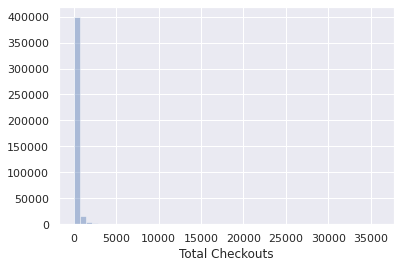

In [10]:
# Histogramm über die Anzahl der Ausleihen
import pandas as pd
import seaborn as sns
%matplotlib inline
sns.set()

df = pd.read_csv("../data/Library_Usage.csv")
sns.distplot(df['Total Checkouts'], kde=False)

In [11]:
# Kreuztabellen
import pandas as pd

df = pd.read_csv(
    "../data/Library_Usage.csv", 
    na_values="none"
)
pd.crosstab(
    df['Provided Email Address'],
    df['Notice Preference Definition'],
    margins=True
)

Notice Preference Definition,email,phone,print,All
Provided Email Address,,,,
False,95,58362,28569,87026
True,323842,9810,2767,336419
All,323937,68172,31336,423445


In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline
sns.set()

# use sample to generate a random subsample
df = pd.read_csv("../data/Library_Usage.csv").sample(n=1000)


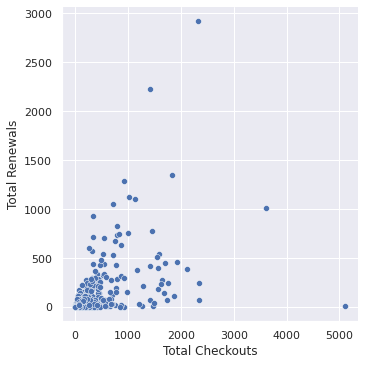

In [13]:
# Streudiagram zur Visualisierung einer bivariaten Verteilung mit metrischen Variablen
sns.relplot(x='Total Checkouts', y='Total Renewals', data=df)

In [16]:
# Größe des Plots ändern
sns.relplot(x='Total Checkouts', y='Total Renewals', data=df
            height=5, aspect=3)

SyntaxError: invalid syntax (<ipython-input-16-b740e0ec45a4>, line 3)

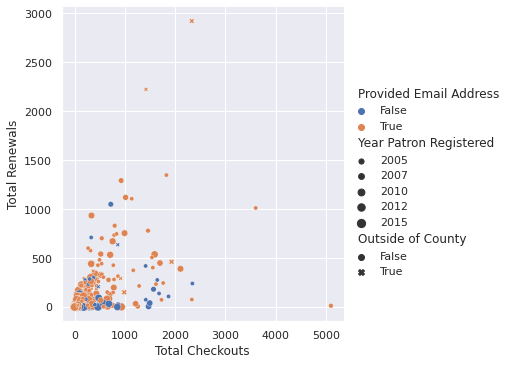

In [17]:
# Mit den zusätzlichen Argumenten hue (Farbe der Punkte/ Linien/ Balken …), 
# size (Größe der Punkte/ Linien/ Balken …), 
# style können weitere Eigenschaften des Plots angepasst werden:
sns.relplot(x='Total Checkouts', y='Total Renewals', 
                hue='Provided Email Address', style='Outside of County', 
                size='Year Patron Registered', data=df)


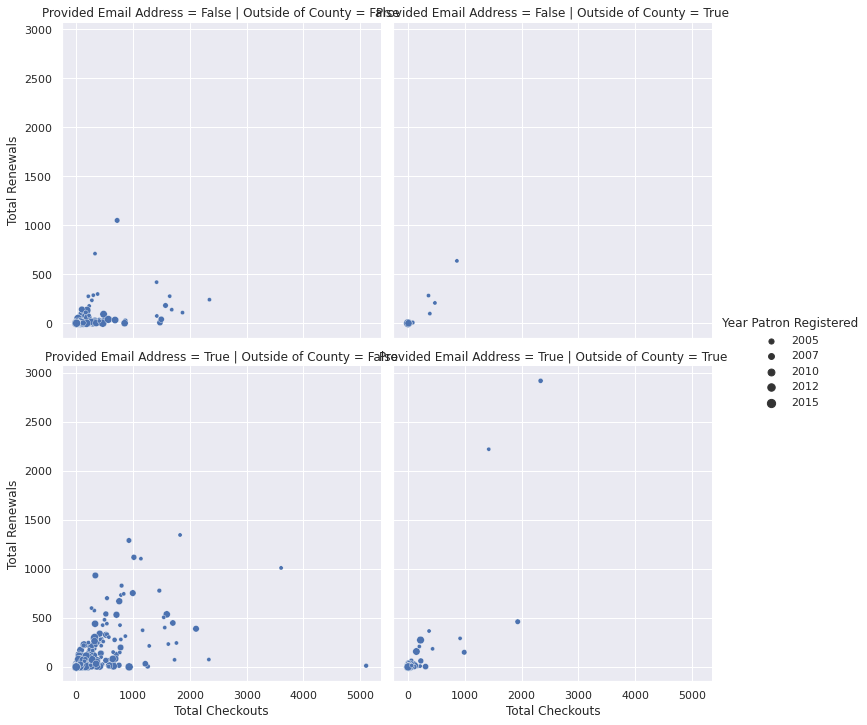

In [18]:
# Plots können mit dem row und/ oder col Argument auch anhand einer oder mehrerer Variablen 
# in Form von Spalten und/ oder Zeilen angeordnet werden:

sns.relplot(x='Total Checkouts', y='Total Renewals', 
            size='Year Patron Registered',
            row='Provided Email Address', col='Outside of County', data=df)


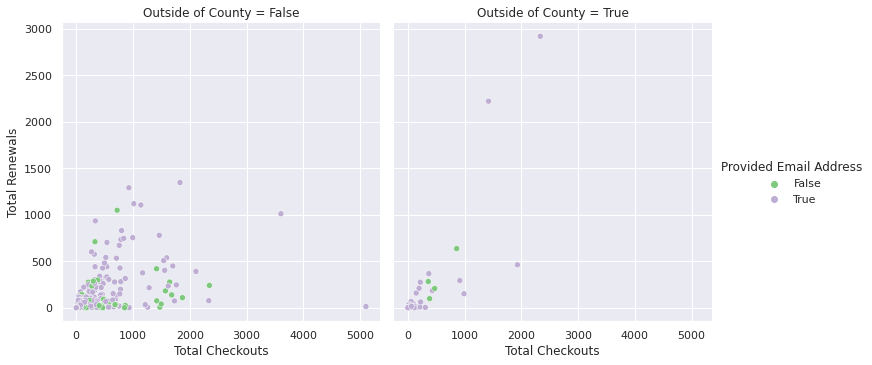

In [19]:
# Mit dem Argument palette können verschiedene Farbpaletten für den hue Parameter ausgewählt werden. 
# Zu empfehlen sind die Paletten von ColorBrewer:

sns.relplot(x='Total Checkouts', y='Total Renewals', 
            hue='Provided Email Address', 
            col='Outside of County',
            palette=sns.color_palette('Accent', 2), 
            data=df)


In [20]:
# weiter Beispiele
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
# matplotlib inline
sns.set()

df = pd.read_csv("../data/Library_Usage.csv")

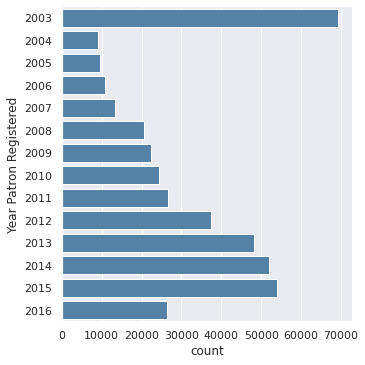

In [21]:
sns.catplot(y='Year Patron Registered',
            data=df, kind='count', color="steelblue")

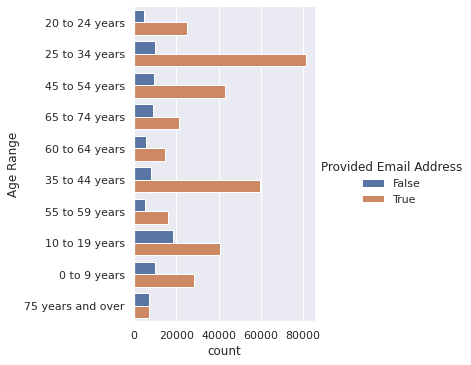

In [22]:
sns.catplot(y='Age Range', hue='Provided Email Address', 
            data=df, kind='count')


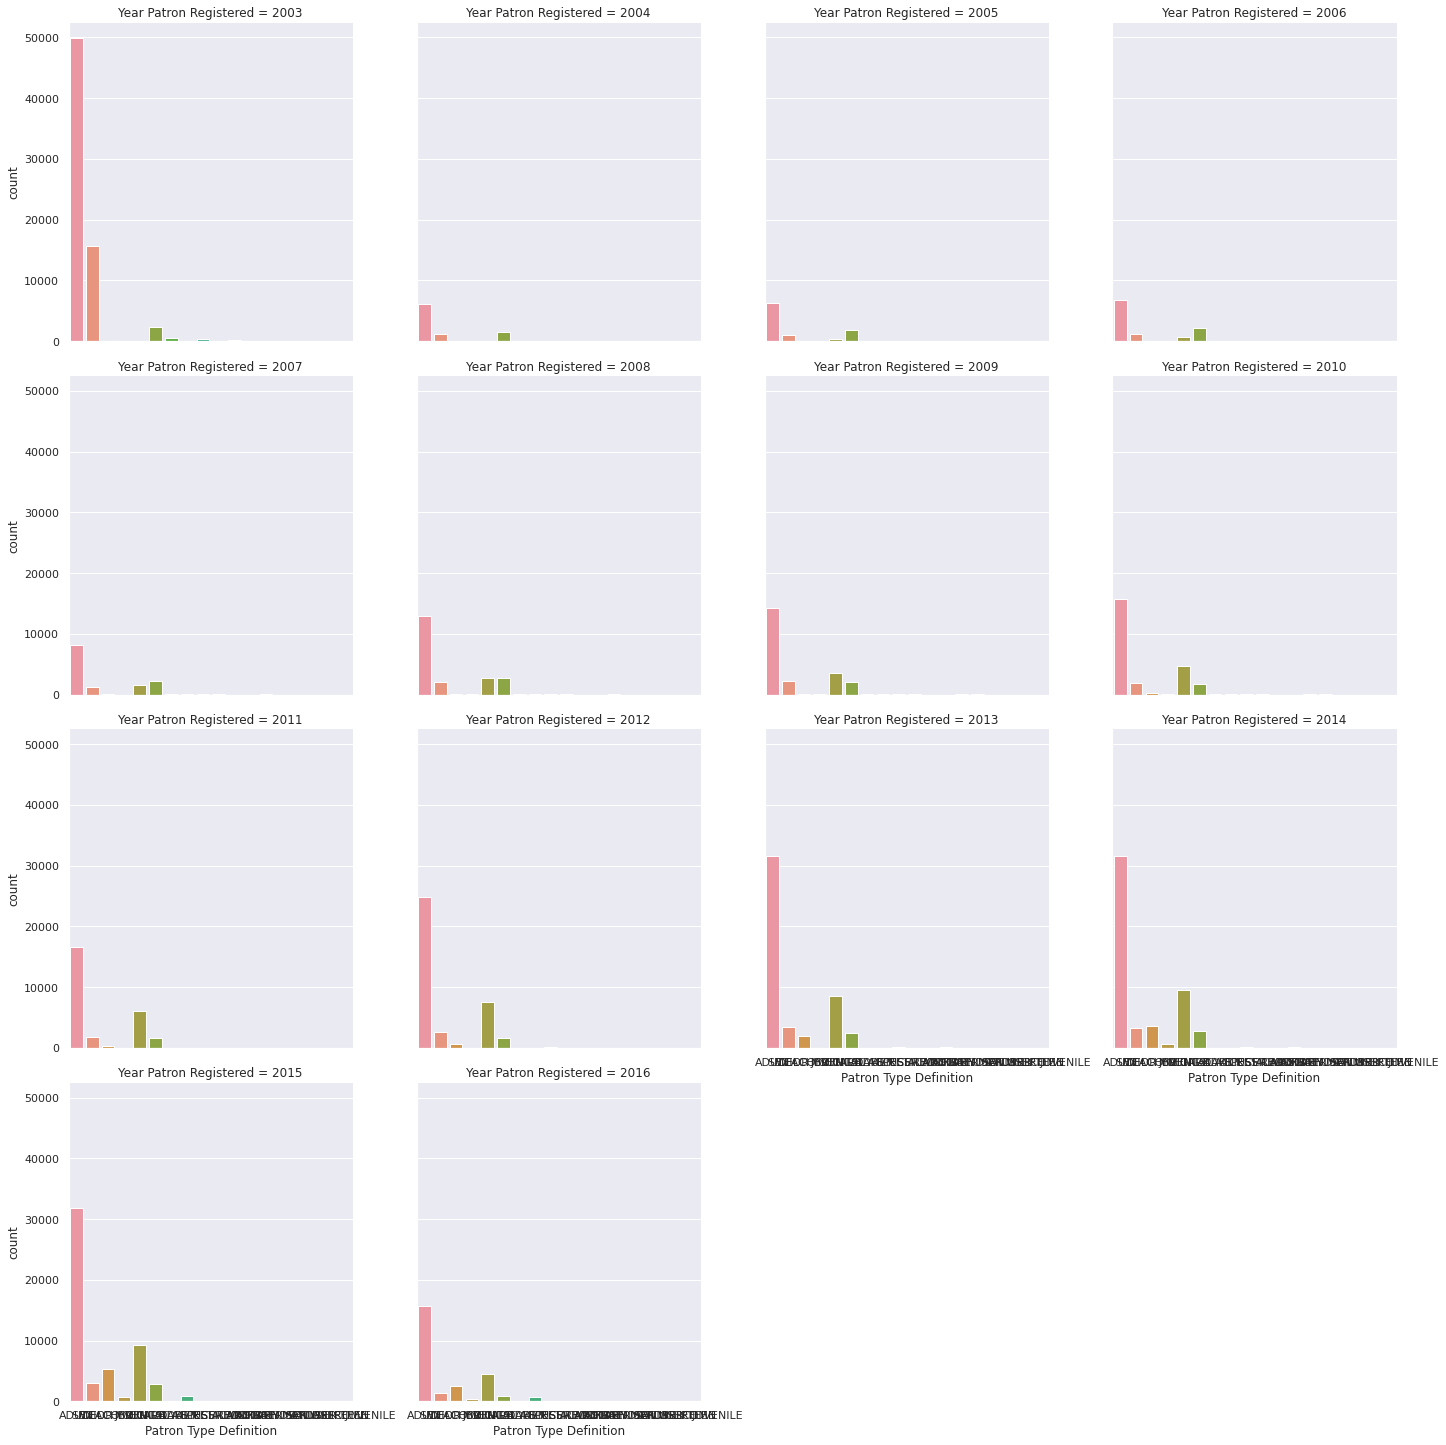

In [23]:
sns.catplot(x='Patron Type Definition', 
            data=df, kind='count', 
            col='Year Patron Registered', col_wrap=4)

/home/silvia/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Total Renewals', ylabel='Density'>

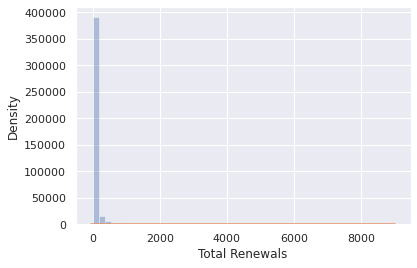

In [24]:
# Histogram

sns.distplot(df['Total Renewals'], kde=False)

# With density estimation

sns.distplot(df['Total Renewals'], kde=True)

In [ ]:
# Swarmplot

sns.catplot(x='Year Patron Registered', y = 'Total Renewals',
            data=df, kind='swarm', color="steelblue", aspect=4)
        

In [ ]:
# Boxplot

sns.catplot(col='Year Patron Registered', y = 'Total Renewals',
            data=df, kind='box', color="steelblue", aspect=4)